In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('county_census_population.csv')

top_cities = pd.read_csv('top_ten_small_cities_US.csv')

In [5]:
#Removed space in column name with underscore
#Cleaning state names from abbrevated form to full form for grouping

df.columns = [column.replace(" ", "_") for column in df.columns]
df = df.replace(to_replace=["OH","PA","FL","MD","NY","TX","VA","NC","WI"], value=["Ohio","Pennsylvania","Florida","Maryland","New York","Texas","Virginia","North Carolina","Wisconsin"])



In [6]:
#Converting string values to integer

for x in df.columns[3:]:
    df[x]=df[x].str.replace('-','0').str.replace(',','').astype(int)

In [7]:
#State-wise summary statistics for total population

df["total_population"] = df["female_total_population"] + df["male_total_population"]

df[["state","total_population"]].groupby("state").describe()


total_population                                        \
                                count          mean           std       min   
state                                                                         
Alabama                         126.0  1.702888e+05  1.419826e+05   65294.0   
Alaska                           18.0  1.641428e+05  9.740523e+04   89694.0   
Arizona                          60.0  6.440885e+05  1.153835e+06   71473.0   
Arkansas                         66.0  1.470322e+05  9.318391e+04   68668.0   
California                      243.0  9.514377e+05  1.651523e+06   63860.0   
Colorado                         67.0  3.962086e+05  1.841243e+05   65065.0   
Connecticut                      48.0  4.486376e+05  3.547740e+05  116632.0   
Delaware                         18.0  3.072802e+05  1.757421e+05  162912.0   
District of Columbia              6.0  6.393553e+05  2.575279e+04  604804.0   
Florida                         240.0  4.696950e+05  5.275287e+05   67355.0   
Georgia                         213.0  2.096077e+05  2.254995e+05   62500.0   
Hawaii                           24.0  3.493283e+05  3.737064e+05   67159.0   
Idaho                            36.0  1.708369e+05  1.175219e+05   77597.0   
Illinois                        138.0  4.789650e+05  1.040135e+06   66369.0   
Indiana                         150.0  1.870201e+05  1.812794e+05   67000.0   
Iowa                             60.0  1.560276e+05  1.066926e+05   66717.0   
Kansas                           48.0  2.173633e+05  1.894052e+05   65738.0   
Kentucky                         78.0  1.635299e+05  1.822902e+05   61764.0   
Louisiana                       102.0  1.953246e+05  1.162180e+05   73237.0   
Maine                            36.0  1.561491e+05  7.103640e+04   68560.0   
Maryland                         96.0  3.514179e+05  3.101152e+05   72563.0   
Massachusetts                    72.0  5.535720e+05  3.942128e+05   70670.0   
Michigan                        175.0  2.988126e+05  3.955573e+05   67116.0   
Minnesota                        81.0  2.813492e+05  2.906822e+05   65014.0   
Mississippi                      60.0  1.302942e+05  5.670416e+04   67802.0   
Missouri                        102.0  2.396525e+05  2.448948e+05   65422.0   
Montana                          33.0  1.030404e+05  2.701793e+04   65370.0   
Nebraska                         18.0  3.324910e+05  1.565609e+05  159789.0   
Nevada                           12.0  1.228162e+06  8.311214e+05  423163.0   
New Hampshire                    36.0  1.899267e+05  1.217083e+05   75874.0   
New Jersey                      126.0  4.228912e+05  2.522601e+05   64215.0   
New Mexico                       58.0  1.678128e+05  1.791396e+05   64362.0   
New York                        234.0  4.763971e+05  6.286785e+05   64586.0   
North Carolina                  240.0  1.967597e+05  1.991845e+05   65944.0   
North Dakota                     21.0  1.001429e+05  3.987987e+04   66565.0   
Ohio                            229.0  2.526571e+05  2.802784e+05   65420.0   
Oklahoma                         66.0  2.127790e+05  2.325196e+05   69699.0   
Oregon                           90.0  2.313925e+05  2.015859e+05   64819.0   
Pennsylvania                    240.0  2.945818e+05  3.081568e+05   63960.0   
Puerto Rico                      66.0  1.411199e+05  8.607858e+04   69623.0   
Rhode Island                     24.0  2.508424e+05  2.251398e+05   82040.0   
South Carolina                  126.0  1.905897e+05  1.160917e+05   66223.0   
South Dakota                     12.0  1.413096e+05  3.794769e+04  101500.0   
Tennessee                       120.0  2.198242e+05  2.199769e+05   66436.0   
Texas                           317.0  4.319525e+05  7.257259e+05   64587.0   
Utah                             36.0  4.064350e+05  3.335306e+05  113418.0   
Vermont                           6.0  1.589948e+05  1.664741e+03  156866.0   
Virginia                        180.0  1.959596e+05  2.035323e+05   629

In [9]:
# Latest year 2015 analysis

data_2015 = df[ (df.year == 2015)]

# TOP 5 POPULATED COUNTIES
data_2015[['county_name','state','total_population']].sort_values(['total_population'], ascending= False)[:5]


,county_name,state,total_population
4309,Los Angeles County,California,10165283
4175,Cook County,Illinois,5238374
4632,Harris County,Texas,4544824
4281,Maricopa County,Arizona,4176283
4325,San Diego County,California,3296237


In [10]:
# LEAST 5 POPULATED COUNTIES

data_2015[['county_name','total_population']].sort_values(['total_population'], ascending= True)[:5]

,county_name,total_population
4250,Pike County,61764
4152,Liberty County,62500
4468,Carbon County,63960
4816,Salem County,64215
4826,Otero County,64362


In [100]:
#STATE WISE TOTAL POPULATION - 2015
data_2015[["state","total_population","female_total_population","male_total_population"]].groupby('state').sum().sort_values(by='total_population', ascending=False)

,total_population,female_total_population,male_total_population
state,,,
California,43519721,21884220,21635501
Texas,23956948,12116046,11840902
Florida,19564003,10047044,9516959
New York,18790322,9681736,9108586
Pennsylvania,11831444,6061413,5770031
Illinois,11037588,5641511,5396077
Michigan,10215471,5240678,4974793
Ohio,9753508,4994331,4759177
New Jersey,8956887,4580656,4376231


Text(0.5, 1.0, 'State wise Male and Female population in 2015')

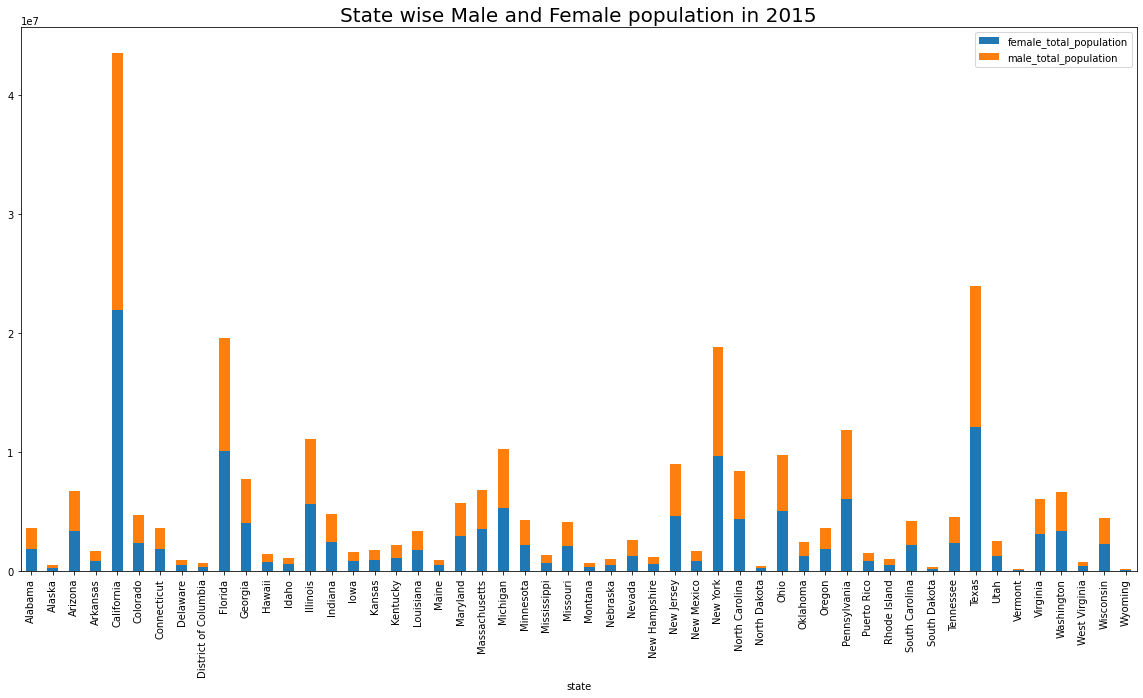

In [101]:

#PLOTTING THE TOTAL POPULATION AS STACKED BARS (MALE / FEMALE)
data_2015[['state','female_total_population','male_total_population']].groupby('state').sum().plot(kind='bar', stacked = True, figsize= (20,10))
plt.title('State wise Male and Female population in 2015', size = 20)


In [11]:
# ANALYSIS 1 - LOS ANGELES COUNTY BECAUSE IT IS THE MOST POPULATED COUNTY FOR BOTH MALES AND FEMALES

los_angeles_county = df[df.county_name == 'Los Angeles County']

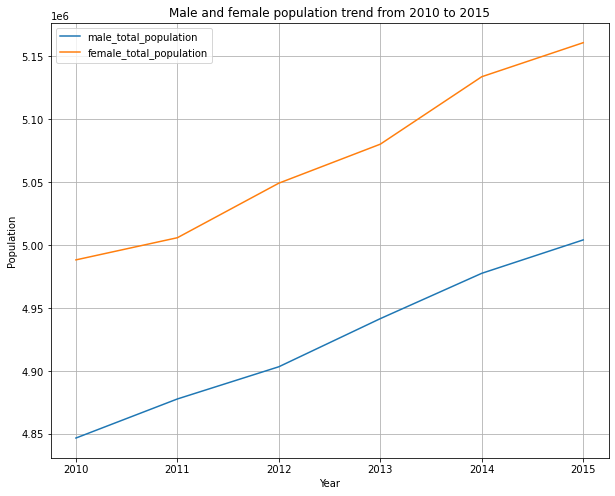

In [12]:
# MALE AND FEMALE POPULATION GROWTH 2010 - 2015

los_angeles_county.plot.line('year',['male_total_population','female_total_population'], figsize = (10,8), grid = True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Male and female population trend from 2010 to 2015')
plt.show()

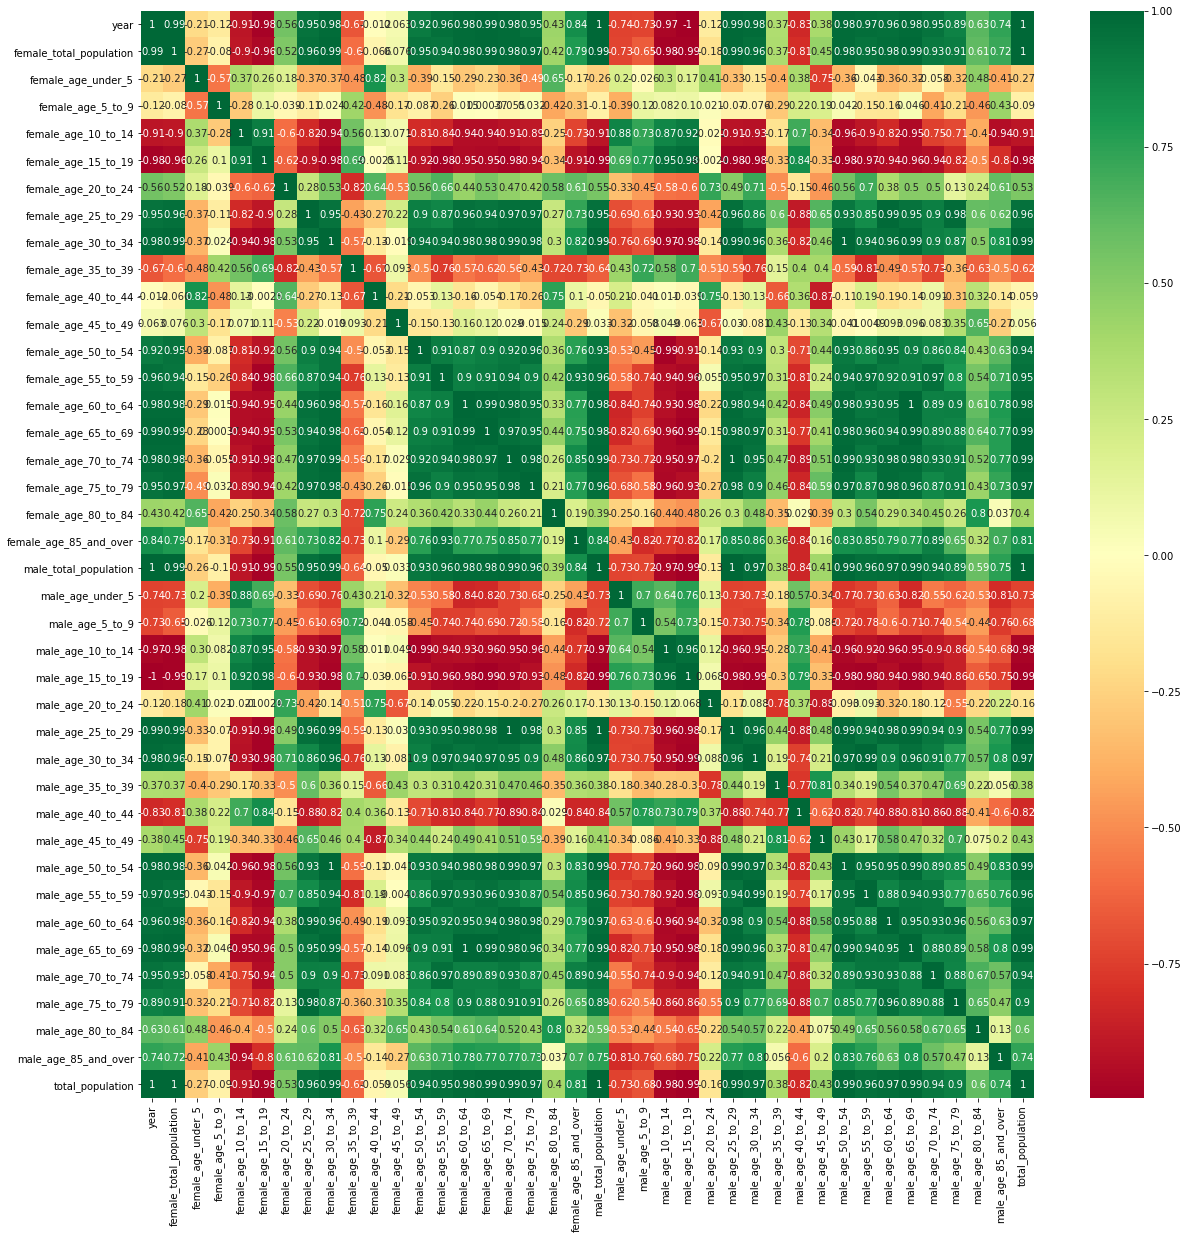

In [102]:
#Corelation matrix for Los Angeles County

plt.subplots(figsize=(20,20))
sns.heatmap(los_angeles_county.corr(), annot=True, cmap='RdYlGn')
plt.show()


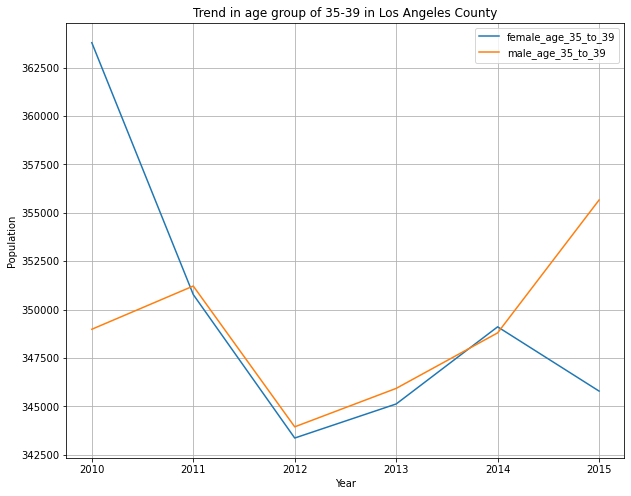

In [15]:
#Converging and diverging phase

los_angeles_county.plot.line('year',['female_age_35_to_39','male_age_35_to_39'], figsize = (10,8), grid = True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Trend in age group of 35-39 in Los Angeles County')
plt.show()

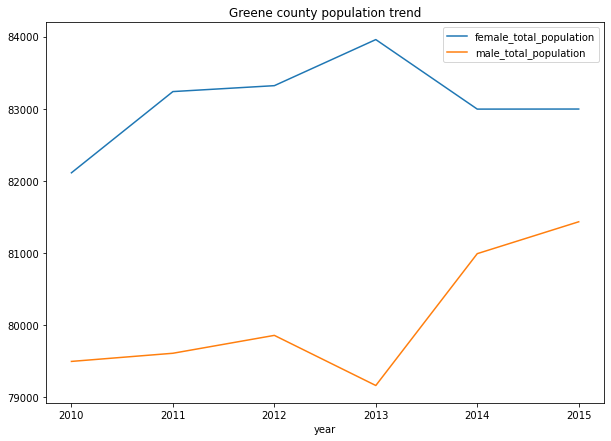

In [95]:
# Selecting Greene county data and plotting the male and female population over the years

greene_county = df[ (df.county_name == "Greene County") & (df.state == "Ohio")]
greene_county.plot.line('year', ['female_total_population','male_total_population'], figsize = (10,7))
plt.title('Greene county population trend')
plt.show()